Q1. How does bagging reduce overfitting in decision trees?

**Bagging** (Bootstrap Aggregating) is an ensemble method that effectively reduces overfitting in decision trees. Let's break down how it achieves this:

1. **Bootstrap Sampling**:
   - Bagging trains multiple decision trees independently, each on a random subset of the data.
   - These subsets are created by **sampling with replacement**, meaning that individual data points can appear more than once in a subset.
   - Each subset is called a **bootstrap sample**.

2. **Reducing Variance**:
   - By training models on different bootstraps, bagging **reduces the variance** of individual decision trees.
   - Variance refers to the sensitivity of a model to fluctuations in the training data. High variance can lead to overfitting.
   - Bagging exposes the constituent models to different parts of the dataset, making them less prone to overfitting.

3. **Aggregating Predictions**:
   - After training, the predictions from all the sampled decision trees are combined.
   - This aggregation can be done through **simple averaging** (for regression problems) or **voting** (for classification problems).
   - The aggregated model incorporates the strengths of individual trees and cancels out their errors.

4. **Generalization and Robustness**:
   - Bagging improves **generalization performance** by reducing overfitting.
   - It creates diversity among the models, enhancing overall performance by **lowering variance** and increasing robustness.

In summary, bagging helps decision trees work together harmoniously, resulting in better prediction accuracy and robustness compared to a single decision tree¹²³.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Generate a synthetic dataset
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Train a single decision tree
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [5]:
# Train a BaggingClassifier with decision trees
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                                n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                  n_estimators=50, random_state=42)

In [6]:
# Make predictions
y_pred_tree = tree_clf.predict(X_test)
y_pred_bagging = bagging_clf.predict(X_test)

In [7]:
# Compute accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

In [8]:
print(f'Accuracy of single decision tree: {accuracy_tree:.2f}')
print(f'Accuracy of bagging ensemble: {accuracy_bagging:.2f}')

Accuracy of single decision tree: 0.86
Accuracy of bagging ensemble: 0.90


In [9]:
# Plot decision boundaries
def plot_decision_boundaries(clf, X, y, ax, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    ax.set_title(title)

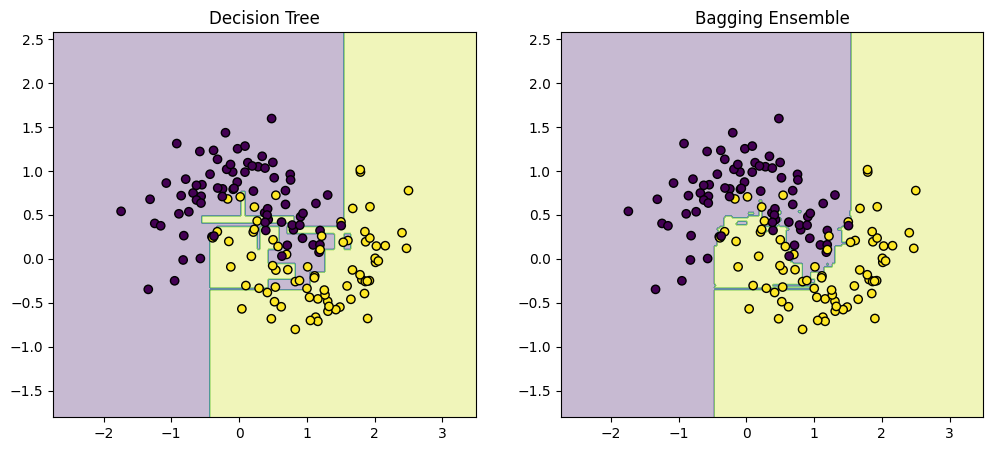

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundaries(tree_clf, X_test, y_test, axes[0], 'Decision Tree')
plot_decision_boundaries(bagging_clf, X_test, y_test, axes[1], 'Bagging Ensemble')

plt.show()

Q2. What are the advantages and disadvantages of using different types of base learners in bagging?

Certainly! Let's delve into the advantages and disadvantages of using different types of base learners in bagging:

1. **Advantages of Bagging (Bootstrap Aggregating):**
   - **Variance Reduction:** Bagging allows multiple weak learners to combine their efforts, often outperforming a single strong learner. By averaging predictions from diverse models, it reduces variance and helps avoid overfitting¹².
   - **Stability:** Bagging improves model stability, making it less sensitive to small changes in the training data.
   - **Applicable to Various Models:** While commonly applied to decision tree methods (e.g., Random Forest), bagging can be used with other base learners as well.

2. **Disadvantages of Bagging:**
   - **Loss of Interpretability:** The ensemble model created by bagging may sacrifice interpretability compared to a single model.
   - **Computationally Intensive:** Training multiple models in parallel can be computationally expensive.

In summary, bagging is effective for reducing variance and improving stability, but it comes at the cost of model interpretability.

Using different types of base learners in bagging can have both advantages and disadvantages, depending on the specific base learner and the problem at hand. Here’s a breakdown of the pros and cons:

### Advantages:

1. **Increased Diversity**:
   - **Advantage**: By using diverse base learners, you can capture a wider range of patterns in the data. This diversity helps in reducing the model's overall variance and improves generalization.
   - **Example**: Combining decision trees, linear models, and support vector machines can lead to a more robust ensemble that performs well across various types of data.

2. **Improved Performance**:
   - **Advantage**: Different base learners may excel in different aspects of the data. Combining them can leverage their individual strengths and lead to better overall performance.
   - **Example**: A decision tree might handle non-linearity well, while a linear model might perform better on linear relationships. Together, they can cover both aspects effectively.

3. **Reduced Risk of Overfitting**:
   - **Advantage**: Since different base learners have different biases and variances, combining them can reduce the risk of overfitting that might occur with a single type of learner.
   - **Example**: Combining a deep neural network with a shallow decision tree might balance the model’s complexity and regularization.

### Disadvantages:

1. **Increased Complexity**:
   - **Disadvantage**: Managing and tuning different types of base learners can be complex and time-consuming. It may require careful consideration of how each learner interacts with the others.
   - **Example**: Combining models like neural networks and support vector machines involves more intricate tuning and parameter selection.

2. **Potential for Reduced Interpretability**:
   - **Disadvantage**: If the base learners are inherently difficult to interpret (e.g., deep neural networks), the ensemble model might also become less interpretable, complicating the understanding of how predictions are made.
   - **Example**: An ensemble of neural networks and random forests might be challenging to explain in terms of feature importance or decision-making processes.

3. **Increased Computational Cost**:
   - **Disadvantage**: Training and maintaining multiple types of base learners can lead to higher computational costs and longer training times.
   - **Example**: Training a mix of complex models like gradient boosting machines and deep learning models may require significant resources compared to a simpler bagging ensemble.

4. **Difficulty in Combining Predictions**:
   - **Disadvantage**: Different base learners may produce predictions in different formats or scales, making it challenging to aggregate their outputs effectively.
   - **Example**: Combining a regression model with a classification model requires careful handling to ensure that the aggregation method (e.g., averaging for regression and voting for classification) is appropriate.

### Summary

Using different types of base learners in bagging can enhance model performance and robustness by introducing diversity and leveraging each learner’s strengths. However, this approach also introduces complexities related to model management, interpretability, and computational costs. The choice of whether to use diverse base learners should be based on the specific requirements and constraints of the problem you’re trying to solve.

Q3. How does the choice of base learner affect the bias-variance tradeoff in bagging?

In **bagging**, the choice of base learner significantly impacts the bias-variance tradeoff. Let's break it down:

1. **Bias**:
   - Bias refers to the average error of a model. A **high bias** indicates that the model is too simplistic and doesn't fit the data well.
   - When using a **low-bias base learner** (e.g., a complex model), bagging can reduce bias because it combines multiple models, each capturing different aspects of the data.

2. **Variance**:
   - Variance describes how much a model's predictions vary across different datasets.
   - Bagging reduces variance by aggregating predictions from multiple base learners. It helps stabilize the model and makes it less sensitive to small variations in the training data.

3. **Tradeoff**:
   - Bagging aims to strike a balance between bias and variance.
   - **Low-bias base learners** (e.g., deep decision trees) tend to have **high variance** individually. Bagging mitigates this by averaging their predictions.
   - However, if the base learner is already **low-variance** (e.g., shallow trees), bagging may not provide significant benefits.

Remember, bagging works best when combining diverse base learners, so choose them wisely!



Q4. Can bagging be used for both classification and regression tasks? How does it differ in each case?

Yes, bagging (Bootstrap Aggregating) can be used for both classification and regression tasks. The fundamental principle of bagging is the same for both types of tasks: it involves creating multiple subsets of the training data, training a separate model on each subset, and then aggregating their predictions to make a final prediction. Here's how it differs between classification and regression:

### Classification

- **Voting Mechanism:** In classification tasks, the predictions from each model are combined using majority voting or some form of consensus mechanism. The final prediction is the class that receives the most votes from the individual models.
  
- **Objective:** The goal is to improve the classification accuracy by reducing variance and avoiding overfitting.

### Regression

- **Averaging Mechanism:** In regression tasks, the predictions from each model are averaged to produce the final prediction. This averaging helps to reduce variance and improve the generalization of the model.

- **Objective:** The goal is to improve the prediction accuracy by reducing the model variance and making the model more robust to fluctuations in the data.

### Summary

- **Classification:** Aggregates predictions using majority voting.
- **Regression:** Aggregates predictions by averaging.

In both cases, bagging helps to improve model performance by combining multiple models to leverage their individual strengths and mitigate their weaknesses.

Q5. What is the role of ensemble size in bagging? How many models should be included in the ensemble?

The ensemble size in bagging plays a crucial role in balancing bias and variance. Here's how it works:

1. **Bias-Variance Trade-off**:
   - Bias refers to the error introduced by approximating a complex problem with a simpler model (e.g., using a linear regression).
   - Variance represents the model's sensitivity to fluctuations in the training data (i.e., how much the model changes with different training sets).
   - Bagging aims to reduce variance by averaging predictions from multiple models, but it can slightly increase bias due to model averaging.
   - The ensemble size impacts this trade-off.

2. **Effect of Ensemble Size**:
   - As the ensemble size increases:
     - **Bias decreases**: More diverse models lead to better approximations of the true underlying relationship.
     - **Variance decreases**: Averaging reduces the impact of individual model fluctuations.
   - However, there's a point of diminishing returns:
     - Adding more models beyond a certain threshold may not significantly improve performance.
     - Computational resources and training time increase with ensemble size.

3. **Guidelines for Choosing Ensemble Size**:
   - **Rule of Thumb**: Start with a moderate ensemble size (e.g., 10-100 models) and evaluate performance.
   - **Cross-Validation**: Use cross-validation to estimate the optimal ensemble size.
   - **Early Stopping**: Monitor performance on a validation set and stop adding models when improvement plateaus.
   - **Domain-Specific Considerations**: Consider the problem complexity, dataset size, and available resources.

Remember, there's no one-size-fits-all answer. Experiment with different ensemble sizes and monitor performance to find the right balance for your specific task.

Q6. Can you provide an example of a real-world application of bagging in machine learning?

 Here are a few more examples of real-world applications of bagging:

### 1. **Customer Churn Prediction**

**Objective:** To predict whether a customer will leave a service or product (churn) in a given period.

**Application:**

- **Data:** Customer features such as purchase history, usage patterns, customer service interactions, and demographic information.
- **Bagging Application:** Multiple decision trees are trained on different bootstrap samples of customer data. Each tree predicts whether a customer will churn or not, and the final prediction is made by majority voting.
- **Benefits:** Reduces variance and improves the model’s ability to generalize across different customer segments.

### 2. **Credit Scoring**

**Objective:** To assess the creditworthiness of loan applicants.

**Application:**

- **Data:** Features include applicant’s credit history, income level, employment status, and existing debts.
- **Bagging Application:** Various models (e.g., decision trees or logistic regression) are trained on bootstrap samples of applicant data. The final credit score prediction is aggregated from these models to improve accuracy and reduce overfitting.
- **Benefits:** Enhances the reliability of credit assessments by averaging out the predictions from multiple models.

### 3. **Medical Diagnosis**

**Objective:** To diagnose medical conditions based on patient data.

**Application:**

- **Data:** Patient features such as symptoms, medical history, test results, and demographic information.
- **Bagging Application:** Ensemble models are trained on different bootstrap samples of patient data to predict medical conditions (e.g., disease presence). The ensemble’s final diagnosis prediction is made by aggregating individual model predictions.
- **Benefits:** Improves diagnostic accuracy and reduces the risk of misdiagnosis by leveraging multiple models.

### 4. **Image Classification**

**Objective:** To classify images into different categories (e.g., identifying objects in images).

**Application:**

- **Data:** Image features extracted from pixel values, textures, or pre-trained neural network embeddings.
- **Bagging Application:** Multiple classifiers or neural networks are trained on bootstrap samples of image data. Each model classifies images into categories, and the final classification is determined by majority voting or averaging probabilities.
- **Benefits:** Enhances classification performance and reduces overfitting, especially when dealing with noisy or diverse image data.

### 5. **Stock Price Prediction**

**Objective:** To forecast future stock prices or returns.

**Application:**

- **Data:** Historical stock prices, trading volumes, financial indicators, and other relevant features.
- **Bagging Application:** Ensemble models such as decision trees or regression models are trained on different bootstrap samples of historical stock data. Predictions are aggregated to forecast future stock prices.
- **Benefits:** Reduces model variance and improves predictive performance by combining multiple forecasts.

These examples illustrate how bagging can be applied across various domains to improve model performance and robustness by leveraging the power of ensemble methods.